In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
plt.style.use('seaborn-v0_8')

## Load Datasets

In [3]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press',
                                                        'skin_thickness', 'insulin', 'BMI',
                                                        'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


/tmp/ipython-input-4210084904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diabetes['age'])


<Axes: xlabel='age', ylabel='Density'>

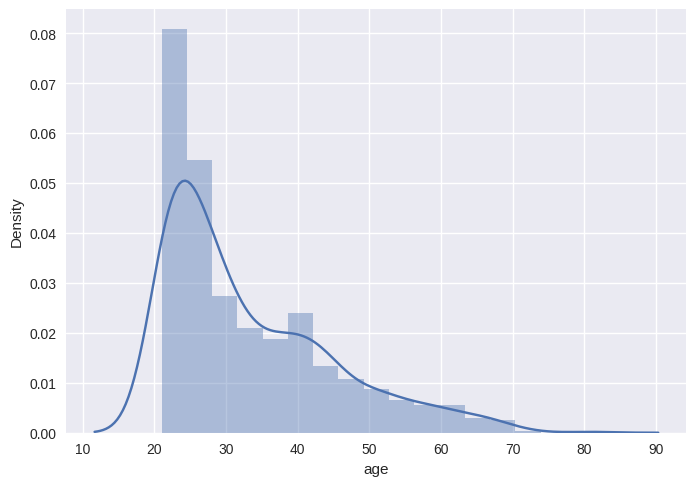

In [5]:
sns.distplot(df_diabetes['age'])

In [6]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Replace 0 dengan median
for col in ['glucose','blood_press','skin_thickness','insulin','BMI']:
    df_diabetes[col] = df_diabetes[col].replace(0, df_diabetes[col].median())

## Split Datasets

In [9]:
scaler = StandardScaler()

In [10]:
features = scaler.fit_transform(df_diabetes.values[:,:8])

In [11]:
labels = df_diabetes.values[:,8:]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20, stratify=labels)

## Define Model

In [13]:
# define the keras sequential model
model = Sequential()

In [14]:
# Artificial Neural Network / Multi-layer Perceptron / Fully Connected Neural Network

# Convolutional Neural Network

# Long-Short Term Memory Neural Network

# Dll...


In [15]:
# relu = range(0,infinit)

In [16]:
model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer
model.add(Dense(6, activation='relu')) # 3rd hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [18]:
# Compile dengan learning rate kecil
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model

In [19]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=500, batch_size=8, validation_split=0.1, callbacks=[early_stop])

Epoch 1/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6587 - loss: 0.6527 - val_accuracy: 0.7581 - val_loss: 0.5616
Epoch 2/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6283 - loss: 0.6416 - val_accuracy: 0.7419 - val_loss: 0.5369
Epoch 3/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6430 - loss: 0.6206 - val_accuracy: 0.7419 - val_loss: 0.5097
Epoch 4/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7036 - loss: 0.5745 - val_accuracy: 0.7419 - val_loss: 0.4895
Epoch 5/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7037 - loss: 0.5707 - val_accuracy: 0.7419 - val_loss: 0.4696
Epoch 6/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7194 - loss: 0.5573 - val_accuracy: 0.7742 - val_loss: 0.4535
Epoch 7/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6971 - loss: 0.5576 - val_accuracy: 0.8065 - val_loss: 0.4424
Epoch 8/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7018 - loss: 0.5467 - val_accuracy: 0.8226 - 

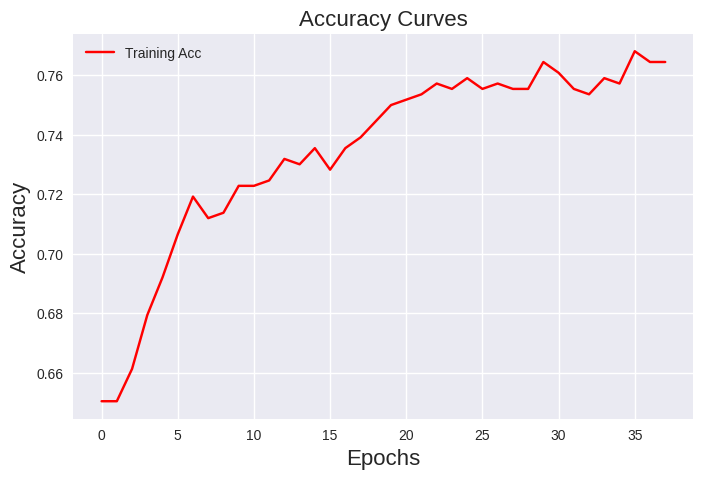

In [20]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

In [21]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 80.52


---